In [1]:
# seaborn : statistical data visualiz based on matplotlib
#!pip install seaborn -U 

In [2]:
# Import libraries
import pandas as pd # pandas : data Analysis & manipulation library
import matplotlib.pyplot as plt # matplotlib: data visualization plotting library
import seaborn as sns # seaborn : statistical data visualization based on matplotlib

In [3]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

In [4]:
#Display the first row of the dataset
print(df.head())

         Date  Product  Quantity   Price
0  2023-01-01  Samsung        50   600.0
1  2023-01-02    Apple        30  1000.0
2  2023-01-03   Xiaomi        70   300.0
3  2023-01-04     OPPO        40   350.0
4  2023-01-05     Vivo        60   400.0


In [5]:
# summary statistics 
print(df.describe())

        Quantity        Price
count  34.000000    34.000000
mean   50.500000   541.617647
std    13.351314   251.362109
min    30.000000   300.000000
25%    37.250000   351.250000
50%    54.500000   412.500000
75%    61.750000   637.500000
max    70.000000  1000.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

Date        0
Product     0
Quantity    0
Price       0
dtype: int64


In [7]:
# Drop rows with missing values
df = df.dropna()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# Total sales for each product 
product_sales = df.groupby('Product')['Quantity'].sum()
print(product_sales)

Product
Apple      231
OPPO       271
Samsung    383
Vivo       363
Xiaomi     469
Name: Quantity, dtype: int64


In [9]:
# Sort the DataFrame by date
df = df.sort_values('Date')

In [10]:
# Set the 'Date' column as the index
df = df.set_index('Date')

In [11]:
# Resample the data to get monthly sales
monthly_sales = df['Quantity'].resample('M').sum()
print(monthly_sales)


Date
2023-01-31    440
2023-02-28    214
2023-03-31    183
2023-04-30    257
2023-05-31    252
2023-06-30    371
Freq: ME, Name: Quantity, dtype: int64


C:\Users\2327238\AppData\Local\Temp\ipykernel_18384\1117822684.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Quantity'].resample('M').sum()


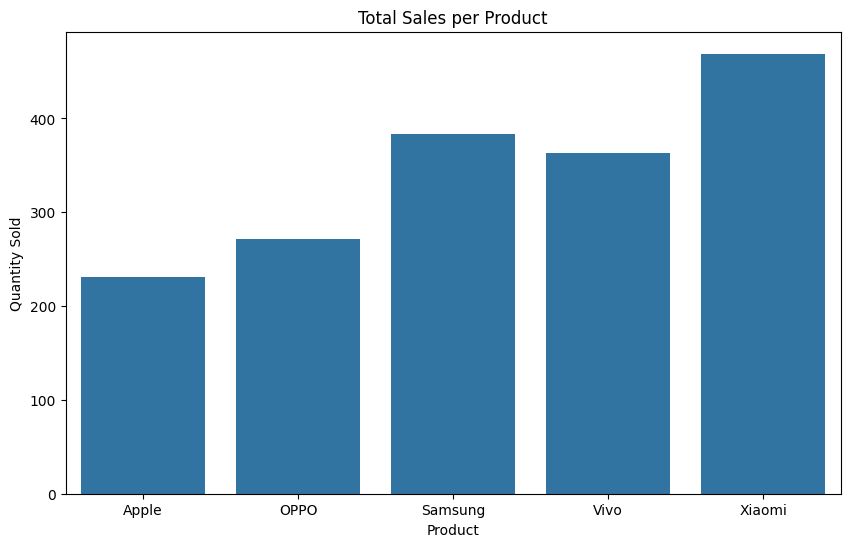

In [12]:
# Bar plot of total sales per product
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

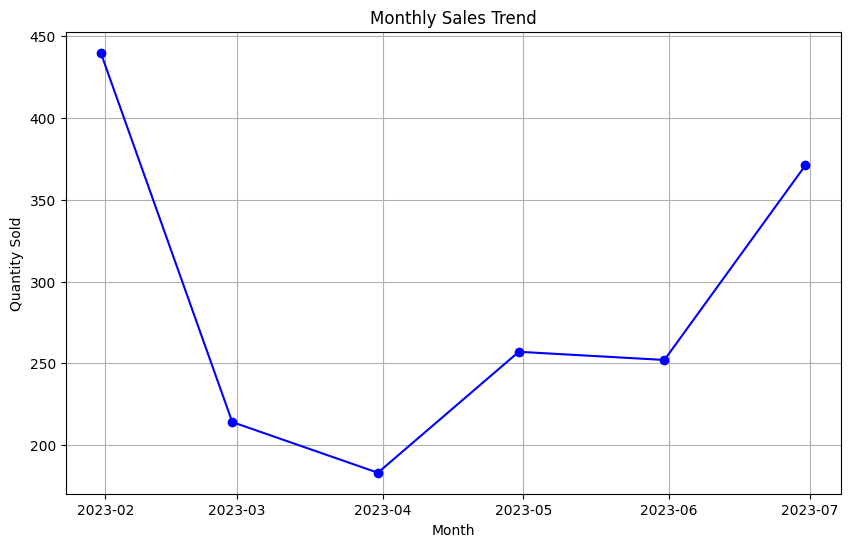

In [13]:
# plot the montly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()